In [4]:
from PIL import Image
from presidio_image_redactor import ImageRedactorEngine

# Get the image to redact using PIL lib (pillow)
image =get_resource_image("ocr_test.png")

# Initialize the engine
engine = ImageRedactorEngine()

# Redact the image with pink color
redacted_image = engine.redact(image, (255, 192, 203))

# save the redacted image 
# redacted_image.save("new_image.png")
# open the image for viewing
redacted_image.show()


In [85]:
image =get_resource_image("ocr_test.png")
image.size

(1098, 1028)

In [93]:


image = ImageChops.duplicate(image)
image_x,image_y=image.size
print (image_x,image_y)
analyzer_engine = ImageAnalyzerEngine()

bboxes = analyzer_engine.analyze(image)
print (bboxes)
fig, ax = plt.subplots()
image_r=70
fig.set_size_inches(image_x/image_r,image_y/image_r)


for box in bboxes:
    entity_type = box.entity_type
    x0 = box.left
    y0 = box.top
    x1 = x0 + box.width
    y1 = y0 + box.height
#             draw.rectangle([x0, y0, x1, y1], fill=fill)
    rect = matplotlib.patches.Rectangle((x0,y0),x1-x0,y1-y0, edgecolor='b', facecolor="none")

    ax.add_patch(rect)
    ax.annotate(entity_type, xy=(x0-3,y0-3),  xycoords='data',
                bbox=dict(boxstyle="round4,pad=.5", fc="0.9")            ) 
ax.imshow(image)
# im = fig2img ( fig )
analyzer_engine = AnalyzerEngine(
    nlp_engine=nlp_engine_with_spanish, 
    supported_languages=["en"]
)
bboxes = analyzer_engine.analyze(image)
print (bboxes)
fig, ax = plt.subplots()
image_r=70
fig.set_size_inches(image_x/image_r,image_y/image_r)


for box in bboxes:
    entity_type = box.entity_type
    x0 = box.left
    y0 = box.top
    x1 = x0 + box.width
    y1 = y0 + box.height
#             draw.rectangle([x0, y0, x1, y1], fill=fill)
    rect = matplotlib.patches.Rectangle((x0,y0),x1-x0,y1-y0, edgecolor='b', facecolor="none")

    ax.add_patch(rect)
    ax.annotate(entity_type, xy=(x0-3,y0-3),  xycoords='data',
                bbox=dict(boxstyle="round4,pad=.5", fc="0.9")            ) 
ax.imshow(image)

1098 1028


TypeError: ImageAnalyzerEngine() takes no arguments

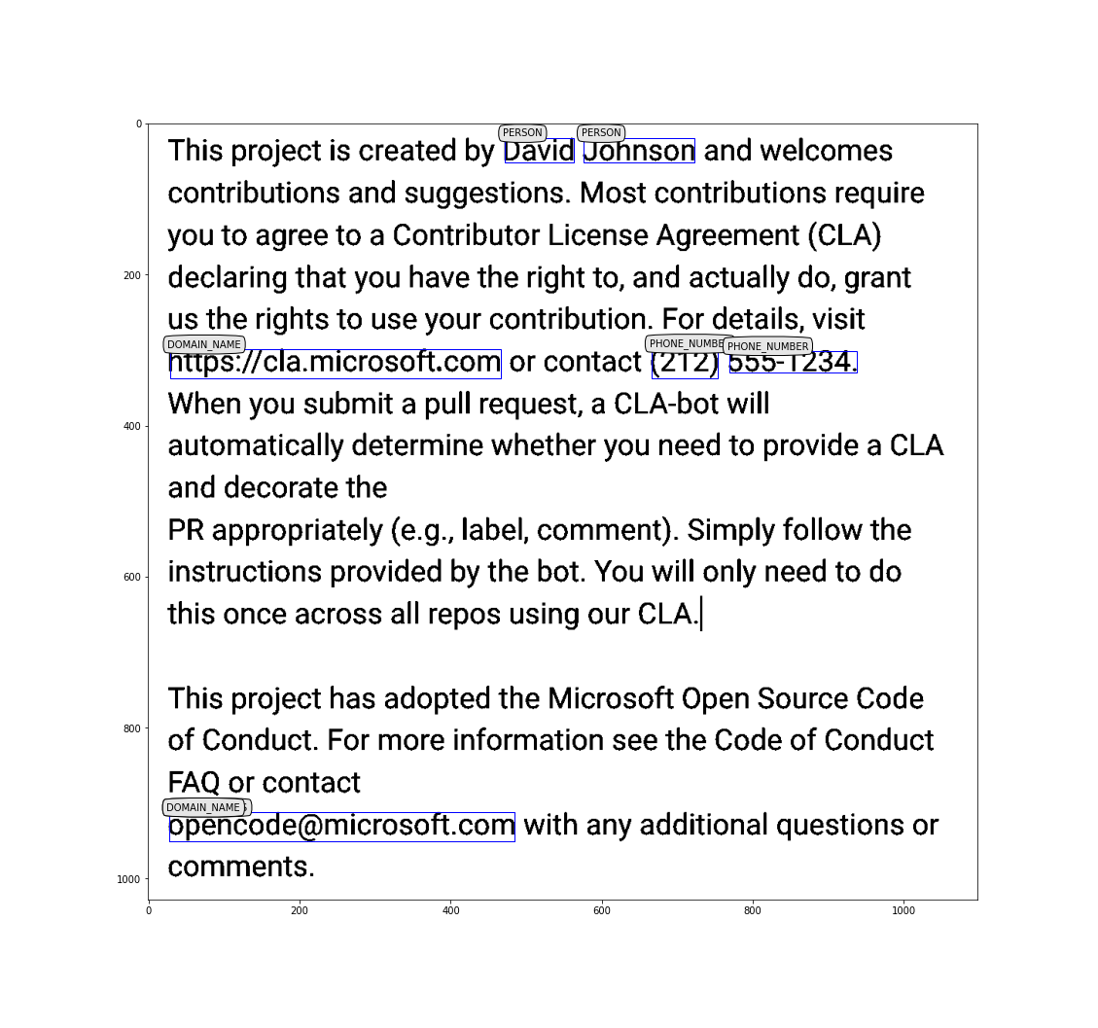

In [88]:
im = fig2img ( fig )
im2=im.resize((image_x,image_y))
im2.save("pii_verify.png")
im2
#     pii_verifying_image.save("/home/newwen/presidio/presidio-image-redactor/tests/integration/resources/pii_verify.png")
git commit -m 'autoformat' presidio-image-redactor/presidio_image_redactor/image_pii_verify_engine.py 
git commit -m 'autoformat' presidio-image-redactor/presidio_image_redactor/image_redactor_engine 


<class 'PIL.Image.Image'> <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'> <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'> <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'PIL.Image.Image'> <class 'PIL.PngImagePlugin.PngImageFile'>


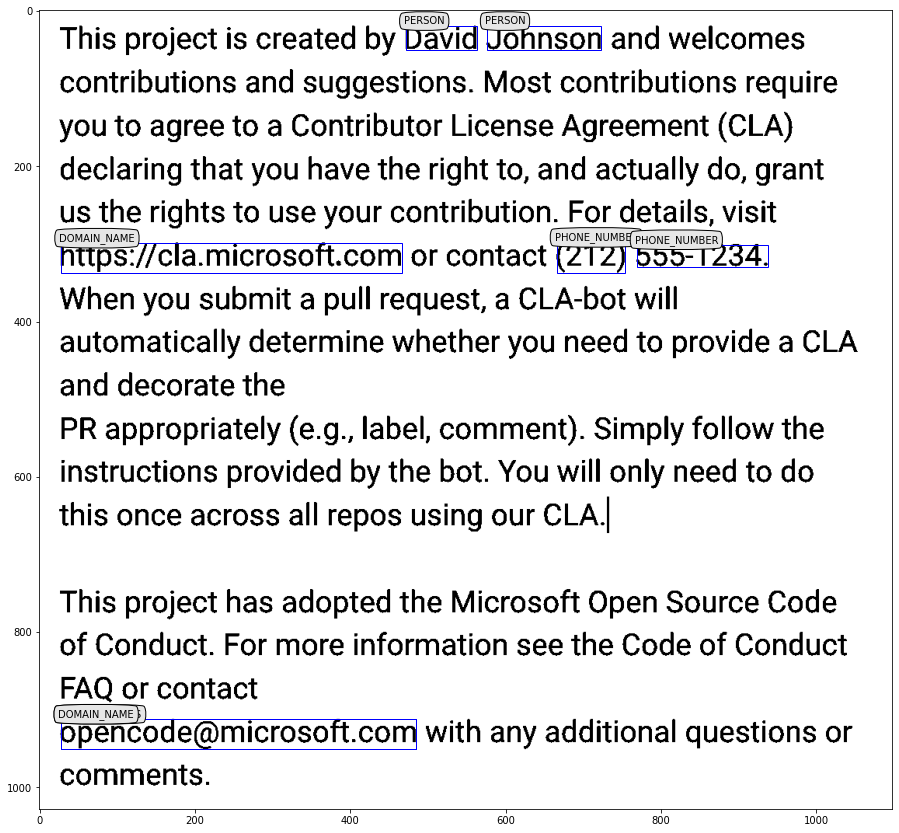

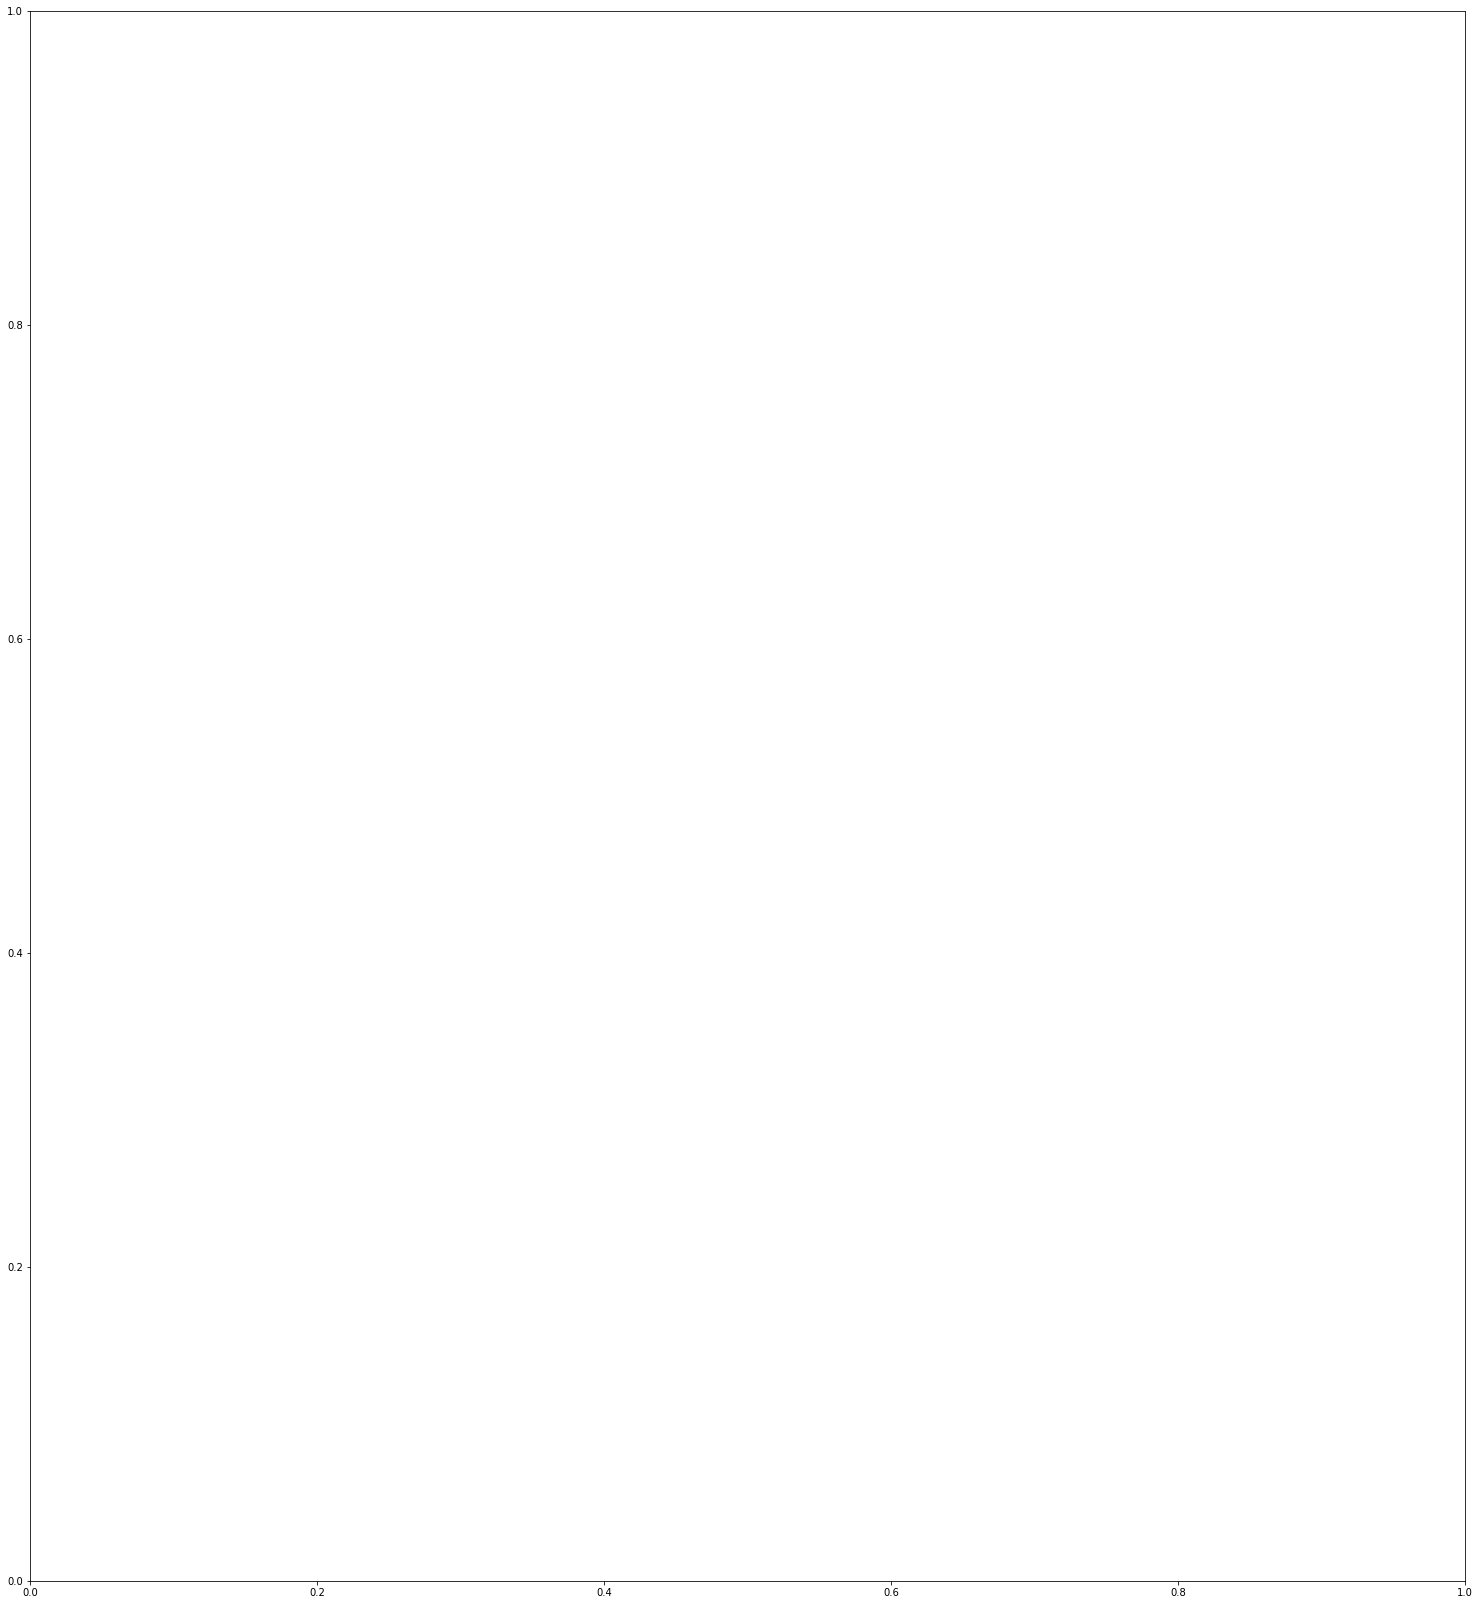

In [84]:
from presidio_image_redactor.image_analyzer_engine import ImageAnalyzerEngine

from typing import Union, Tuple
from PIL import Image, ImageDraw, ImageChops
import matplotlib
from presidio_image_redactor.image_analyzer_engine import ImageAnalyzerEngine
def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img
class ImagePiiVerifyEngine:
    """ImagePiiVerifyEngine class only supporting Pii verification currently."""

    def __init__(self):
        self.analyzer_engine = ImageAnalyzerEngine()

    def verify(
        self, image: Image    ) -> Image:
        """Redact method to redact the given image.

        Please notice, this method duplicates the image, creates a new instance and
        manipulate it.
        :param image: PIL Image to be processed

        :return: the redacted image
        """

        image = ImageChops.duplicate(image)
        image_x,image_y=image.size
#         print (image_x,image_y)
        analyzer_engine = ImageAnalyzerEngine()
        bboxes = analyzer_engine.analyze(image)
#         print (bboxes)
        fig, ax = plt.subplots()
        image_r=70
        fig.set_size_inches(image_x/image_r,image_y/image_r)

        if len(bboxes) == 0:
            return image
        else:
            for box in bboxes:
                entity_type = box.entity_type
                x0 = box.left
                y0 = box.top
                x1 = x0 + box.width
                y1 = y0 + box.height
            #             draw.rectangle([x0, y0, x1, y1], fill=fill)
                rect = matplotlib.patches.Rectangle((x0,y0),x1-x0,y1-y0, edgecolor='b', facecolor="none")

                ax.add_patch(rect)
                ax.annotate(entity_type, xy=(x0-3,y0-3),  xycoords='data',
                            bbox=dict(boxstyle="round4,pad=.5", fc="0.9")            )

            ax.imshow(image)
            im = fig2img ( fig )
            im2=im.resize((image_x,image_y))            
    #         i1 = image.histogram()
    #         i2 = im2.histogram()
    #         print(i1,i2)
            return im2

def test_given_image_without_text_and_pii_verify_then_image_does_not_change():
    # Image without PII entities
    image = get_resource_image("no_ocr.png")
    pii_verifying_image = ImagePiiVerifyEngine().verify(image)
    assert compare_images(pii_verifying_image, image)
def test_given_image_with_text_and_Pii_is_shown():
    # Image with PII entities
    image = get_resource_image("ocr_test.png")
    pii_verifying_image = ImagePiiVerifyEngine().verify(image)
    expected_result_image = get_resource_image("pii_verify.png")
    assert compare_images(pii_verifying_image, expected_result_image)
    assert not compare_images(pii_verifying_image, image)

def compare_images(image_one: Image, image_two: Image):
    print(type(image_one),type(image_two))
    i1 = image_one.histogram()
    i2 = image_two.histogram()

    result = math.sqrt(
        reduce(operator.add, map(lambda a, b: (a - b) ** 2, i1, i2)) / len(i1)
    )
    return result == 0

test_given_image_with_text_and_Pii_is_shown()    
test_given_image_without_text_and_pii_verify_then_image_does_not_change()

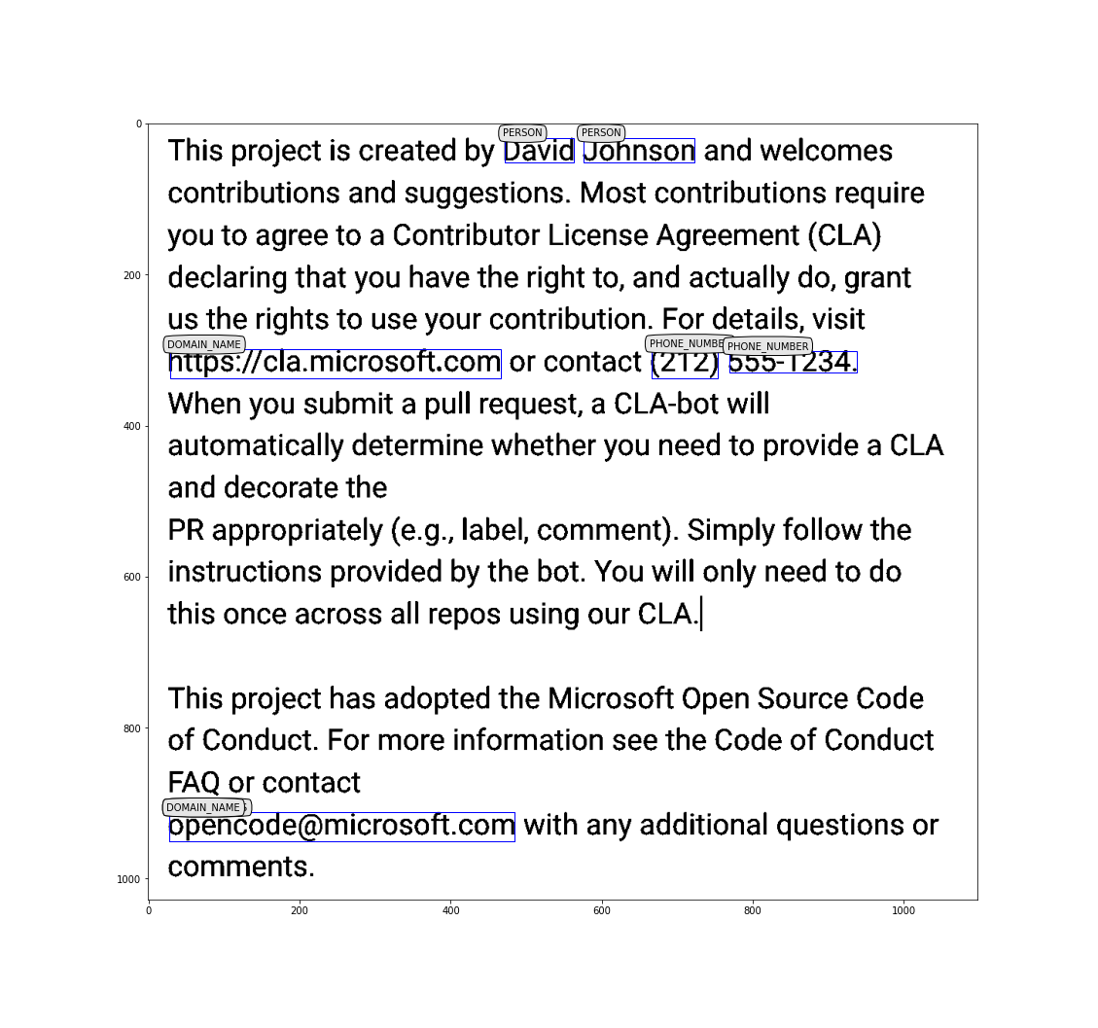

In [63]:
engine = ImagePiiVerifyEngine()
image2 = engine.verify(image)
image2

# Analyze Text for PII Entities

<br>Using Presidio Analyzer, analyze a text to identify PII entities. 
<br>The Presidio analyzer is using pre-defined entity recognizers, and offers the option to create custom recognizers.

<br>The following code sample will:
<ol>
<li>Set up the Analyzer engine - load the NLP module (spaCy model by default) and other PII recognizers</li>
<li> Call analyzer to get analyzed results for "PHONE_NUMBER" entity type</li>
</ol>

In [ ]:
text_to_anonymize = "His name is Mr. Jones and his phone number is 212-555-5555"

In [ ]:
analyzer = AnalyzerEngine()
analyzer_results = analyzer.analyze(text=text_to_anonymize, entities=["PHONE_NUMBER"], language='en')

print(analyzer_results)

# Create Custom PII Entity Recognizers

<br>Presidio Analyzer comes with a pre-defined set of entity recognizers. It also allows adding new recognizers without changing the analyzer base code,
<b>by creating custom recognizers. 
<br>In the following example, we will create two new recognizers of type `PatternRecognizer` to identify titles and pronouns in the analyzed text.
<br>A `PatternRecognizer` is a PII entity recognizer which uses regular expressions or deny-lists.

<br>The following code sample will:
<ol>
<li>Create custom recognizers</li>
<li>Add the new custom recognizers to the analyzer</li>
<li>Call analyzer to get results from the new recognizers</li>
</ol>


In [ ]:
titles_recognizer = PatternRecognizer(supported_entity="TITLE",
                                      deny_list=["Mr.","Mrs.","Miss"])

pronoun_recognizer = PatternRecognizer(supported_entity="PRONOUN",
                                      deny_list=["he", "He", "his", "His", "she", "She", "hers" "Hers"])

analyzer.registry.add_recognizer(titles_recognizer)
analyzer.registry.add_recognizer(pronoun_recognizer)

analyzer_results = analyzer.analyze(text=text_to_anonymize,
                            entities=["TITLE", "PRONOUN"],
                            language="en")
print(analyzer_results)


Call Presidio Analyzer and get analyzed results with all the configured recognizers - default and new custom recognizers

In [ ]:
analyzer_results = analyzer.analyze(text=text_to_anonymize, language='en')

analyzer_results

# Anonymize Text with Identified PII Entities

<br>Presidio Anonymizer iterates over the Presidio Analyzer result, and provides anonymization capabilities for the identified text.
<br>The anonymizer provides 5 types of anonymizers - replace, redact, mask, hash and encrypt. The default is **replace**

<br>The following code sample will:
<ol>
<li>Setup the anonymizer engine </li>
<li>Create an anonymizer request - text to anonymize, list of anonymizers to apply and the results from the analyzer request</li>
<li>Anonymize the text</li>
</ol>

In [ ]:
anonymizer = AnonymizerEngine()

anonymized_results = anonymizer.anonymize(
    text=text_to_anonymize,
    analyzer_results=analyzer_results,    
    anonymizers_config={"DEFAULT": AnonymizerConfig("replace", {"new_value": "<ANONYMIZED>"}), 
                        "PHONE_NUMBER": AnonymizerConfig("mask", {"type": "mask", "masking_char" : "*", "chars_to_mask" : 12, "from_end" : True}),
                        "TITLE": AnonymizerConfig("redact", {})}
)

print(anonymized_results)